In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
data = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
test1 = test.copy()

* use of pipelines
* hyperparameter testing
* transported stat within categories 
* separate groups?? 
* fill na values according to context
* standardize numerical values

EDA

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data[['group', 'pos']] = (data['PassengerId'].str.split('_', expand = True))
data[['deck', 'num', 'side']] = (data['Cabin'].str.split('/', expand = True))
data['expenses'] = data['RoomService']+data['FoodCourt']+ data['ShoppingMall']+data['Spa']+data['VRDeck']
test[['group', 'pos']] = (test['PassengerId'].str.split('_', expand = True))
test[['deck', 'num', 'side']] = (test['Cabin'].str.split('/',
                                                         expand = True))
test['expenses'] = test['RoomService']+test['FoodCourt']+ test['ShoppingMall']+test['Spa']+test['VRDeck']
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,pos,deck,num,side,expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S,4637.0


In [5]:
data['group'].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: group, Length: 6217, dtype: int64

In [8]:
df = data.copy()
df_y = df.pop("Transported")

# Label encoding for categoricals
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = df.dtypes == int

In [14]:
df = df.fillna(df.mean())

In [15]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(j, k, discrete_features):
    mi_scores = mutual_info_classif(j, k, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=j.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scoreeees = make_mi_scores(df, df_y, discrete_features)

In [16]:
mi_scoreeees

PassengerId     0.693121
Name            0.675740
Cabin           0.542349
group           0.512914
num             0.143346
expenses        0.117649
CryoSleep       0.113554
Spa             0.080669
RoomService     0.075950
VRDeck          0.062076
ShoppingMall    0.050108
FoodCourt       0.043371
deck            0.023157
HomePlanet      0.018931
Destination     0.006161
side            0.005271
pos             0.004350
Age             0.000944
VIP             0.000702
Name: MI Scores, dtype: float64

<AxesSubplot:>

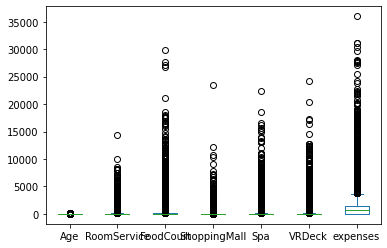

In [17]:
data.plot(kind = 'box')

outliers of expenses

In [ ]:
for n in ['HomePlanet', 'Destination', '']
sns.countplot(x= 'Transported', hue = , data= train)

In [24]:
data.groupby(['Destination'])['Transported'].sum()

Destination
55 Cancri e      1098
PSO J318.5-22     401
TRAPPIST-1e      2787
Name: Transported, dtype: int64

In [32]:
related = []
ref = {}
for n in ['group', 'num', 'CryoSleep', 'deck','HomePlanet', 'Destination', 'side', 'pos', 'VIP']:
    if (data.groupby([n])['Transported'].sum()/data[n].value_counts()).std()>= 0.07:
        related.append(n)
        ref[n] = (data.groupby([n])['Transported'].sum()/data[n].value_counts()).std()
    

In [31]:
related

['group',
 'num',
 'CryoSleep',
 'deck',
 'HomePlanet',
 'Destination',
 'side',
 'VIP']

In [33]:
ref

{'group': 0.46887603956688373,
 'num': 0.3176913519067887,
 'CryoSleep': 0.3455364852714629,
 'deck': 0.17049516964598346,
 'HomePlanet': 0.11792771930945621,
 'Destination': 0.0725945418165408,
 'side': 0.07338156808950125,
 'VIP': 0.08798007810289028}

<AxesSubplot:xlabel='Age', ylabel='Count'>

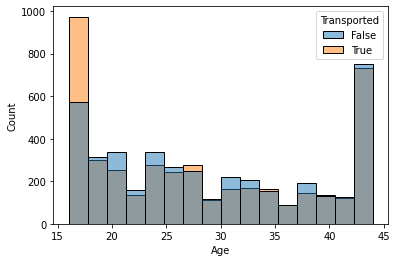

In [46]:
sns.histplot(data= data, x = 'Age', hue= 'Transported')


<AxesSubplot:xlabel='Age'>

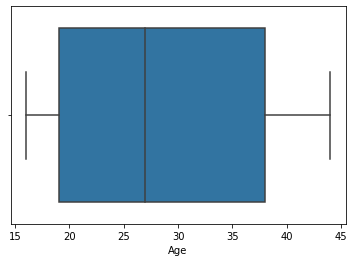

In [43]:
sns.boxplot(data= data, x = 'Age')

In [44]:
cols = ['Age', 'expenses']
data[cols]= data[cols].clip(lower= data[cols].quantile(0.15), upper= data[cols].quantile(0.85), axis=1)

In [37]:
related.append('Age')

<AxesSubplot:xlabel='expenses', ylabel='Count'>

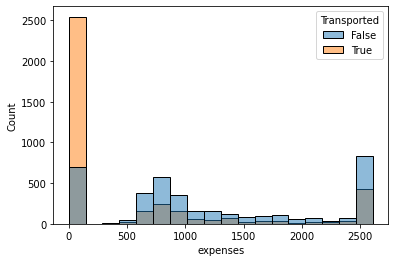

In [45]:
sns.histplot(data= data, x = 'expenses', hue= 'Transported')

<AxesSubplot:xlabel='expenses', ylabel='Count'>

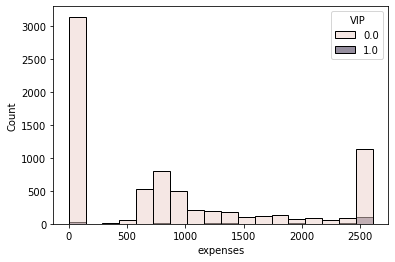

In [52]:
sns.histplot(data= data, x = 'expenses', hue= 'VIP')

In [49]:
df_all_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'expenses']

,Feature 1,Feature 2,Correlation Coefficient
7,expenses,expenses,1.000000
9,expenses,FoodCourt,0.447278
10,expenses,Spa,0.391368
12,expenses,VRDeck,0.384140
15,expenses,RoomService,0.359202
17,expenses,Transported,0.357925
18,expenses,ShoppingMall,0.283720
23,expenses,Age,0.234219


In [53]:
data['expenses'].isnull().sum()

908

<AxesSubplot:xlabel='Age', ylabel='expenses'>

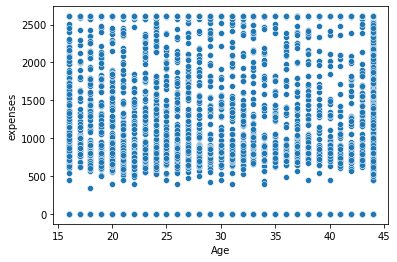

In [50]:
sns.scatterplot(data = data, x = 'Age', y= 'expenses')

no obvious relationship, fill with 0

In [ ]:
X = data[['group', 'num', 'CryoSleep', 'expenses']]
test = test[['group', 'num', 'CryoSleep', 'expenses']]
X

In [ ]:
y = data['Transported']

In [ ]:
X.isnull().sum()

model building

In [ ]:
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan
    
X['num']= X['num'].apply(f)
X['group']= X['group'].apply(f)
test['num']= test['num'].apply(f)
test['group']=test['group'].apply(f)

In [ ]:
X.dtypes

In [ ]:
'''
X['CryoSleep'].fillna('False')
X['CryoSleep']= X['CryoSleep'].astype('bool')
'''

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
y 

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)
categorical_cols = ['CryoSleep']
numerical_cols = [c for c in X.columns if not c=='CryoSleep']

In [ ]:
X_train['CryoSleep'].fillna(X_train['CryoSleep'].mode()[0], inplace= True)
X_valid['CryoSleep'].fillna(X_valid['CryoSleep'].mode()[0], inplace= True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace= True)


In [ ]:
numerical_cols

In [ ]:
X_valid.dtypes

In [ ]:
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
'''
cat_imputer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 
'''
oh= OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols), 
        ('cat', oh, categorical_cols)
    ])

In [ ]:
categorical_cols

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train.dtypes

In [ ]:
f = pd.DataFrame()
f['j'] = X_train['CryoSleep']

In [ ]:
def get_score(n):
    p = Pipeline(steps = [('preprocessor', preprocessor),
                        ('model', XGBClassifier(n_estimators=n, early_stopping_rounds = 5))])
    p.fit(X_train, y_train, model__eval_set=[(X_valid.to_numpy(), y_valid)],
             )
    pred= p.predict(X_valid)
    score = mean_absolute_error(y_valid, pred)
    return score

In [ ]:
X_train

In [ ]:
model = XGBClassifier(n_estimators=500, early_stopping_rounds = 5)
pa = Pipeline(steps = [('preprocessor', preprocessor),
                        ('model', model)])
pa.fit(X_train, y_train, model__eval_set=[(X_valid.to_numpy(), y_valid)],
             )
pred= pa.predict(X_valid)

In [ ]:
pred

In [ ]:
X_train

In [ ]:
get_score(500)

In [ ]:
p = Pipeline(steps = [('preprocessor', preprocessor),
                        ('model', XGBClassifier(n_estimators=300, early_stopping_rounds = 5))])
p.fit(X_train, y_train, model__eval_set=[(X_valid.to_numpy(), y_valid)],
             )

In [ ]:
sub = p.predict(test)

In [ ]:
test

In [ ]:
df= pd.DataFrame(sub)

In [ ]:
def num2bool(x):
    if x==0:
        return False
    else: 
        return True
    

df['Transported']= df[0].apply(num2bool)

In [ ]:
df = df.drop([0], axis =1)
df = df.set_index(test1['PassengerId'])

In [ ]:
df

In [ ]:
df.to_csv('sub.csv')

In [ ]:
X_valid.dtypes

In [ ]:
d = {}
i =300
while i < 1100:
    d[i] = get_score(i)
    i += 100

In [ ]:
d